In [1]:
TRAIN_PATH = '../data/raw/train/'
TEST_PATH  = '../data/raw/test/'

In [2]:
import cv2
import pathlib
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
data_dir = pathlib.Path(TRAIN_PATH)

In [6]:
dfs = []
total = 0

for i in range(1,10):
    image_path = pd.Series(list(data_dir.glob(f'{i}/*'))).astype(str)
    
    labels = pd.Series(np.full((len(image_path)), i))
    
    total += len(image_path)
    print(len(image_path), total)
    
    dfs.append(pd.concat([image_path, labels], axis=1))

738 738
636 1374
621 1995
582 2577
379 2956
427 3383
389 3772
394 4166
463 4629


In [7]:
df = pd.concat(dfs, axis=0, ignore_index=True)

In [8]:
df.columns = ['image_path', 'label']

In [9]:
def read_shape(row):
    # read image
    img = cv2.imread(row[0], -1)
    
    # get shape
    sh = img.shape
    
    return pd.Series(list(sh))

In [10]:
df[['height', 'width']] = df.apply(lambda row: read_shape(row), axis=1)

In [11]:
df['aspect ratio'] = df['width'] / df['height']

In [12]:
df.groupby('label').describe()

height                                                           width  \
       count        mean        std   min    25%    50%    75%    max  count   
label                                                                          
1      738.0  107.754743  14.261305  64.0   99.0  106.5  116.0  160.0  738.0   
2      636.0  110.062893  16.172373  53.0   99.0  108.0  118.0  179.0  636.0   
3      621.0  107.064412  14.092747  63.0   99.0  106.0  115.0  160.0  621.0   
4      582.0  108.731959  14.344314  52.0  100.0  108.0  118.0  155.0  582.0   
5      379.0  109.134565  16.300269  59.0   98.0  107.0  118.5  159.0  379.0   
6      427.0  107.437939  15.516696  53.0   98.0  106.0  116.0  159.0  427.0   
7      389.0  108.627249  14.913060  59.0   99.0  107.0  116.0  202.0  389.0   
8      394.0  109.708122  14.670203  76.0   99.0  108.0  117.0  160.0  394.0   
9      463.0  108.224622  13.757378  59.0  100.0  107.0  116.0  150.0  463.0   

                                                         aspect ratio  \
            mean       std   min   25%   50%   75%   max        count   
label                                                                   
1      21.421409  4.361224  14.0  19.0  21.0  22.0  62.0        738.0   
2      36.773585  4.763278  21.0  34.0  36.0  39.0  61.0        636.0   
3      42.745572  4.590629  26.0  40.0  43.0  46.0  61.0        621.0   
4      39.273196  5.803074  19.0  36.0  40.0  42.0  64.0        582.0   
5      35.955145  3.087883  26.0  34.0  36.0  38.0  55.0        379.0   
6      40.707260  4.534274  28.0  38.0  40.0  43.0  57.0        427.0   
7      43.329049  4.535053  22.0  41.0  43.0  46.0  78.0        389.0   
8      41.469543  3.761373  26.0  39.0  41.0  44.0  60.0        394.0   
9      40.889849  3.999292  26.0  38.0  40.0  43.0  64.0        463.0   

                                                                             
           mean       std       min       25%       50%       75%       max  
label                                                                        
1      0.200587  0.038924  0.105960  0.180551  0.194915  0.210526  0.568807  
2      0.338654  0.051445  0.175000  0.314683  0.339623  0.361702  0.698113  
3      0.404506  0.059117  0.263566  0.371681  0.401869  0.429825  0.714286  
4      0.364746  0.055205  0.163793  0.333333  0.370370  0.396040  0.565217  
5      0.335602  0.050648  0.225352  0.308372  0.336634  0.357895  0.593750  
6      0.384827  0.058887  0.200000  0.353492  0.383838  0.408248  0.735849  
7      0.403864  0.054205  0.194690  0.379630  0.398305  0.428571  0.703125  
8      0.382227  0.043244  0.254902  0.359459  0.385896  0.406250  0.542169  
9      0.381779  0.045083  0.204724  0.357798  0.380952  0.400000  0.610169

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,4629.0,4.471808,2.639520,1.00000,2.000000,4.000000,7.000000,9.000000
height,4629.0,108.472456,14.878445,52.00000,99.000000,107.000000,117.000000,202.000000
width,4629.0,37.099590,8.491328,14.00000,34.000000,39.000000,43.000000,78.000000
aspect ratio,4629.0,0.346268,0.084521,0.10596,0.308943,0.362637,0.397959,0.735849


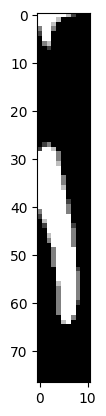

In [14]:
img = cv2.imread(df['image_path'][0])
img = cv2.resize(img, (0,0), fx=0.5, fy=0.5) 
plt.imshow(img)
plt.show()

In [15]:
#new_image_width = 78
#new_image_height = 202
#size = len(df)
#train_full_labels = df['label'].values
#train_full_set = np.empty((size, new_image_height//2, new_image_width//2, 1), dtype=np.float32)
#
#for idx, path in enumerate(df['image_path']):
#    img = plt.imread(path)
#    old_image_height, old_image_width = img.shape
#    
#    result = np.full((new_image_height,new_image_width), 0, dtype=np.uint8)
#    
#    # compute center offset
#    x_center = (new_image_width - old_image_width) // 2
#    y_center = (new_image_height - old_image_height) // 2
#    
#
#    # copy img image into center of result image
#    result[y_center:y_center+old_image_height, x_center:x_center+old_image_width] = img
#    
#    img = result.reshape(new_image_height, new_image_width, 1)
#    train_full_set[idx] = cv2.resize(img, (0,0), fx=0.5, fy=0.5).reshape(new_image_height//2, new_image_width//2, 1)
#
#print('train_full_set.shape =>', train_full_set.shape)
#print('train_full_labels.shape =>', train_full_labels.shape)

In [61]:
train = []

for i in range(1, 10):
    train.append(df[df['label'] == i].sample(500, replace=True))
    
traindf = pd.concat(train, axis=0, ignore_index=True)
traindf

,image_path,label,height,width,aspect ratio
0,../data/raw/train/1/vaxalpr_1615NRT_20201110_1...,1,102,20,0.196078
1,../data/raw/train/1/vaxalpr_1984YRT_20201114_1...,1,146,24,0.164384
2,../data/raw/train/1/vaxalpr_1628SRT_20201111_0...,1,106,19,0.179245
3,../data/raw/train/1/vaxalpr_1563YRT_20201114_1...,1,118,23,0.194915
4,../data/raw/train/1/vaxalpr_1572GES_20201112_0...,1,120,20,0.166667
...,...,...,...,...,...
4495,../data/raw/train/9/vaxalpr_1661SRT_20201116_1...,9,117,43,0.367521
4496,../data/raw/train/9/vaxalpr_2982LRT_20201112_1...,9,91,40,0.439560
4497,../data/raw/train/9/vaxalpr_2991WA_20201115_12...,9,102,40,0.392157
4498,../data/raw/train/9/vaxalpr_1598YWE_20201115_1...,9,107,40,0.373832


In [62]:
new_image_width = 40
new_image_height = 108
size = len(traindf)
train_full_labels = traindf['label'].values
train_full_set = np.empty((size, new_image_height, new_image_width, 1), dtype=np.float32)

for idx, path in enumerate(traindf['image_path']):
    img = cv2.imread(path, -1)
    img = cv2.resize(img, (new_image_width, new_image_height), interpolation=cv2.INTER_NEAREST)
    train_full_set[idx] = img.reshape(new_image_height, new_image_width, 1)
    

print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (4500, 108, 40, 1)
train_full_labels.shape => (4500,)


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.05, shuffle=True, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (4275, 108, 40, 1)
X_valid.shape => (225, 108, 40, 1)
y_train.shape => (4275,)
y_valid.shape => (225,)


In [64]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    validation_split=0)

In [65]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=[new_image_height, new_image_width, 1]),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  #tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  #tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 108, 40, 1)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 40, 16)       160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 20, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 54, 20, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 27, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 10, 64)       

In [67]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=datagen.flow(X_valid, y_valid),
    epochs=50)

Epoch 1/50
134/134 [==============================] - 3s 19ms/step - loss: 1.7026 - accuracy: 0.3832 - val_loss: 0.7480 - val_accuracy: 0.8000
Epoch 2/50
134/134 [==============================] - 2s 16ms/step - loss: 0.8881 - accuracy: 0.6875 - val_loss: 0.4549 - val_accuracy: 0.8844
Epoch 3/50
134/134 [==============================] - 2s 16ms/step - loss: 0.6451 - accuracy: 0.7855 - val_loss: 0.3021 - val_accuracy: 0.9200
Epoch 4/50
134/134 [==============================] - 2s 16ms/step - loss: 0.4849 - accuracy: 0.8388 - val_loss: 0.1842 - val_accuracy: 0.9600
Epoch 5/50
134/134 [==============================] - 2s 16ms/step - loss: 0.4270 - accuracy: 0.8706 - val_loss: 0.1288 - val_accuracy: 0.9600
Epoch 6/50
134/134 [==============================] - 2s 16ms/step - loss: 0.3703 - accuracy: 0.8854 - val_loss: 0.0923 - val_accuracy: 0.9689
Epoch 7/50
134/134 [==============================] - 2s 16ms/step - loss: 0.3559 - accuracy: 0.8926 - val_loss: 0.1392 - val_accuracy: 0.9644

In [69]:
test_dir = pathlib.Path(TEST_PATH)

In [70]:
dfs = []
total = 0

for i in range(1,10):
    image_path = pd.Series(list(test_dir.glob(f'{i}/*'))).astype(str)
    
    labels = pd.Series(np.full((len(image_path)), i))
    
    total += len(image_path)
    print(len(image_path), total)
    
    dfs.append(pd.concat([image_path, labels], axis=1))

100 100
100 200
100 300
100 400
100 500
100 600
100 700
100 800
100 900


In [71]:
test_df = pd.concat(dfs, axis=0, ignore_index=True)
test_df.columns = ['image_path', 'label']

In [72]:
new_image_width = 40
new_image_height = 108
test_full_labels = test_df['label'].values
test_full_set = np.empty((900, new_image_height, new_image_width, 1), dtype=np.float32)
for idx, path in enumerate(test_df['image_path']):
    img = cv2.imread(path, -1)
    img = cv2.resize(img, (new_image_width, new_image_height), interpolation=cv2.INTER_NEAREST)
    test_full_set[idx] = img.reshape(new_image_height, new_image_width, 1)
    
print('test_full_set.shape =>', test_full_set.shape)
print('test_full_labels.shape =>', test_full_labels.shape)

test_full_set.shape => (900, 108, 40, 1)
test_full_labels.shape => (900,)


In [73]:
y_pred = np.argmax(model.predict(test_full_set), axis=-1)

In [74]:
test_df['pred'] = y_pred

In [75]:
misses = test_df[test_df['label'] != test_df['pred']]

In [76]:
misses

,image_path,label,pred
57,../data/raw/test/1/vaxalpr_732AAL_20201115_085...,1,9
157,../data/raw/test/2/vaxalpr_214AYT_20201113_111...,2,3
370,../data/raw/test/4/vaxalpr_214AYT_20201113_111...,4,7
488,../data/raw/test/5/vaxalpr_593LRT_20201116_122...,5,4


label:  1 , pred:  9


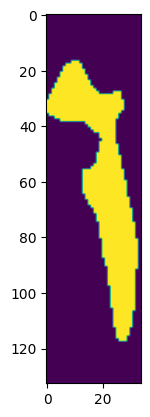

label:  2 , pred:  3


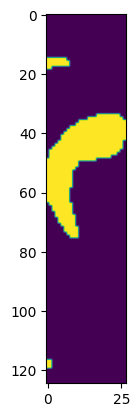

label:  4 , pred:  7


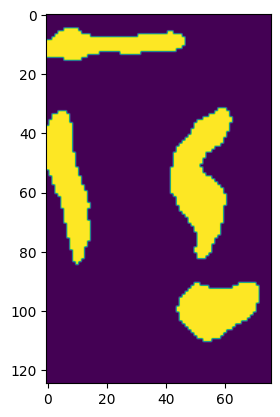

label:  5 , pred:  4


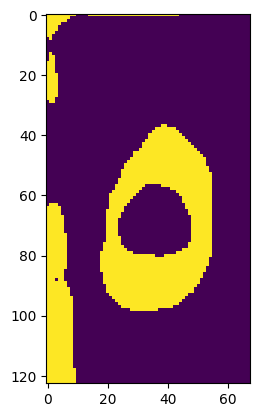

In [77]:
for i in range(len(misses)):
    img = plt.imread(misses.iloc[i][0])
    plt.imshow(img)
    print('label: ', misses.iloc[i][1], ', pred: ', misses.iloc[i][2])
    plt.show()